## 모델의 성능 향상시키기

### 1. 데이터의 확인과 검증셋

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import pandas as pd

# 와인 데이터 불러오기
df = pd.read_csv('./data/wine.csv', header=None)

# 데이터 미리보기
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [3]:
# 와인의 속성을 X로 와인의 분류를 y로 저장
X = df.iloc[:, :12]
y = df.iloc[:, 12]

# 학습셋과 테스트셋으로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# 모델의 구조 설정
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

# 모델 실행
history = model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                390       
                                                                 
 dense_1 (Dense)             (None, 12)                372       
                                                                 
 dense_2 (Dense)             (None, 8)                 104       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
8/8 [==============================] - 2s 51ms/step - loss: 9.4795 - accuracy: 0.2481 - val_loss: 6.8169 - val_accuracy: 0.2446
Epoch 2/50
8/8 [==============================] - 0

In [4]:
# 테스트 결과 출력
score = model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 [==============================] - 0s 2ms/step - loss: 0.1755 - accuracy: 0.9369
Test accuracy: 0.936923086643219


### 2. 모델 업데이트하기

기본 코드 불러오기

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 와인 데이터 불러오기
df = pd.read_csv('./data/wine.csv', header=None)


In [6]:
# 와인의 속성을 X로 와인의 분류를 y로 저장
X = df.iloc[:, :12]
y = df.iloc[:, 12]

# 학습셋과 테스트셋으로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# 모델의 구조 설정
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 30)                390       
                                                                 
 dense_5 (Dense)             (None, 12)                372       
                                                                 
 dense_6 (Dense)             (None, 8)                 104       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [7]:
# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

모델의 저장 설정 및 실행

In [8]:
# 모델 저장의 조건을 설정

'''
ModelCheckpoint는 모델이 학습하면서 정의한 조건을 만족했을 때
Model의 weight 값을 중간 저장해 줍니다. 학습시간이 꽤 오래걸린다면,
모델이 개선된 validation score를 도출해낼 때마다 weight를 중간 저장함으로써,
혹시 중간에 memory overflow나 crash가 나더라도 다시 weight를 불러와서
학습을 이어나갈 수 있기 때문에, 시간을 save할 수 있습니다.

# {epoch:02d} : 현재 학습 epoch의 숫자. 2자리로 표현되도록 지정
# {val_accuracy:.4f} : 검증 데이터셋에서의 모델 정확도. 소수점 4자리까지 표현
# hdf5 : 파일 확장자. 딥러닝 모델의 가중치와 구조를 저장하는데 사용
'''

modelpath = "./data/model/all/{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)

# 모델 실행
history = model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25,
                    verbose=0, callbacks=[checkpointer])


Epoch 1: saving model to ./data/model/all/01-0.8754.hdf5

Epoch 2: saving model to ./data/model/all/02-0.8600.hdf5

Epoch 3: saving model to ./data/model/all/03-0.8823.hdf5

Epoch 4: saving model to ./data/model/all/04-0.9100.hdf5

Epoch 5: saving model to ./data/model/all/05-0.9085.hdf5

Epoch 6: saving model to ./data/model/all/06-0.9169.hdf5

Epoch 7: saving model to ./data/model/all/07-0.9238.hdf5

Epoch 8: saving model to ./data/model/all/08-0.9238.hdf5

Epoch 9: saving model to ./data/model/all/09-0.9285.hdf5

Epoch 10: saving model to ./data/model/all/10-0.9269.hdf5

Epoch 11: saving model to ./data/model/all/11-0.9277.hdf5

Epoch 12: saving model to ./data/model/all/12-0.9262.hdf5

Epoch 13: saving model to ./data/model/all/13-0.9269.hdf5

Epoch 14: saving model to ./data/model/all/14-0.9262.hdf5

Epoch 15: saving model to ./data/model/all/15-0.9285.hdf5

Epoch 16: saving model to ./data/model/all/16-0.9262.hdf5

Epoch 17: saving model to ./data/model/all/17-0.9285.hdf5

Epoch

In [9]:
# 테스트 결과 출력
score = model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 [==============================] - 0s 2ms/step - loss: 0.1498 - accuracy: 0.9492
Test accuracy: 0.9492307901382446


### 3. 그래프로 과적합 확인하기

In [10]:
# 그래프 확인을 위한 긴 학습
history = model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25)

Epoch 1/2000
8/8 [==============================] - 0s 19ms/step - loss: 0.1512 - accuracy: 0.9438 - val_loss: 0.1725 - val_accuracy: 0.9354
Epoch 2/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.1494 - accuracy: 0.9438 - val_loss: 0.1662 - val_accuracy: 0.9392
Epoch 3/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.1488 - accuracy: 0.9435 - val_loss: 0.1636 - val_accuracy: 0.9392
Epoch 4/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.1461 - accuracy: 0.9464 - val_loss: 0.1662 - val_accuracy: 0.9377
Epoch 5/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.1470 - accuracy: 0.9459 - val_loss: 0.1640 - val_accuracy: 0.9431
Epoch 6/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.1462 - accuracy: 0.9451 - val_loss: 0.1599 - val_accuracy: 0.9400
Epoch 7/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.1438 - accuracy: 0.9446 - val_loss: 0.1610 - val_accuracy: 0.9377
Epoch 8/2000
8/8 [=

In [11]:
# history에 저장된 학습 결과를 확인
hist_df = pd.DataFrame(history.history)
hist_df

,loss,accuracy,val_loss,val_accuracy
0,0.151172,0.943803,0.172544,0.935385
1,0.149376,0.943803,0.166218,0.939231
2,0.148786,0.943546,0.163582,0.939231
3,0.146098,0.946369,0.166183,0.937692
4,0.147004,0.945856,0.164041,0.943077
...,...,...,...,...
1995,0.026950,0.992302,0.061699,0.983846
1996,0.027223,0.992815,0.064352,0.982308
1997,0.029183,0.991532,0.061990,0.983846
1998,0.028958,0.992045,0.066207,0.977692


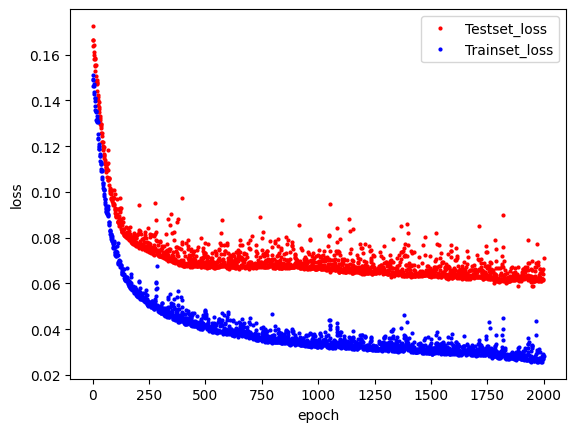

In [12]:
# y_vloss에 테스트셋(여기서는 검증셋)의 오차를 저장
y_vloss = hist_df['val_loss']

# y_loss에 학습셋의 오차를 저장
y_loss = hist_df['loss']

# x값을ㅇ 지정하고 테스트셋(검증셋)의 오차를 빨간색으로, 학습셋의 오차를 파란색으로 표시
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label="Testset_loss")
plt.plot(x_len, y_loss, "o", c="blue", markersize=2, label="Trainset_loss")

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

### 4. 학습의 자동 중단

기본 코드 불러오기

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split

import os
import pandas as pd


# 와인 데이터 불러오기
df = pd.read_csv('./data/wine.csv', header=None)

# 와인의 속성을 X로 와인의 분류를 y로 저장
X = df.iloc[:, :12]
y = df.iloc[:, 12]

# 학습셋과 테스트셋으로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# 모델의 구조 설정
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 30)                390       
                                                                 
 dense_9 (Dense)             (None, 12)                372       
                                                                 
 dense_10 (Dense)            (None, 8)                 104       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


학습의 자동 중단 및 최적화 모델 저장

In [17]:
from pandas.io.feather_format import FilePath
# 학습이 언제 자동 중단될지를 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

# 최적화 모델이 저장될 폴더와 모델의 이름 설정
modelpath = "./data/model/bestmodel.hdf5"

# 최적화 모델을 업데이트하고 저장
checkpointer = ModelCheckpoint(filepath = modelpath, monitor='val_loss', verbose=0,
                               save_best_only=True)

# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

# 모델을 실행
history = model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25,
                    callbacks=[early_stopping_callback, checkpointer])


Epoch 1/2000
8/8 [==============================] - 1s 36ms/step - loss: 0.3213 - accuracy: 0.8509 - val_loss: 0.2977 - val_accuracy: 0.8754
Epoch 2/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.2734 - accuracy: 0.8976 - val_loss: 0.2698 - val_accuracy: 0.9054
Epoch 3/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.2457 - accuracy: 0.9207 - val_loss: 0.2500 - val_accuracy: 0.9108
Epoch 4/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.2296 - accuracy: 0.9233 - val_loss: 0.2435 - val_accuracy: 0.9177
Epoch 5/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.2192 - accuracy: 0.9261 - val_loss: 0.2361 - val_accuracy: 0.9192
Epoch 6/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.2118 - accuracy: 0.9279 - val_loss: 0.2315 - val_accuracy: 0.9208
Epoch 7/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.2065 - accuracy: 0.9287 - val_loss: 0.2299 - val_accuracy: 0.9238
Epoch 8/2000
8

In [19]:
# 테스트 결과를 출력

score = model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 [==============================] - 0s 4ms/step - loss: 0.0594 - accuracy: 0.9862
Test accuracy: 0.9861538410186768
